# Deep Feedforward Networks - a general description

**Deep feedforward networks**, also often called feedforward neural networks, or **multilayer perceptrons (MLPs)**, are the quintessential deep learning models. The goal of a feedforward network is to approximate some function $f^*$. For example, for a classifier, $y = f^∗(x)$ maps an input $x$ to a category $y$. A feedforward network defines a mapping $y = f (x; θ)$ and learns the value of the parameters θ that result in the best function approximation.
 
These models are called feedforward because information flows through the function being evaluated from $x$, through the intermediate computations used to define $f$, and finally to the output $y$. 

Feedforward neural networks are called networks because they are typically represented by composing together many different functions. The model is asso- ciated with a directed acyclic graph describing how the functions are composed together. For example, we might have three functions $f^{(1)}$,$ f^{(2)}$, and  $f^{(3)}$ connected in a chain, to form $f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$. These chain structures are the most commonly used structures of neural networks. In this case, $f^{(1)}$ is called the first layer of the network, $f^{(2)}$ is called the second layer, and so on. 



The overall **length of the chain** gives the **depth** of the model. It is from this terminology that the name **“deep learning”** arises. The final layer of a feedforward network is called the **output layer**. During neural network training, we drive $f(x)$ to match $f^∗(x)$. The training data provides us with noisy, approximate examples of $f^∗(x)$ evaluated at different training points. Each example $x$ is accompanied by a label $y ≈ f^∗(x)$. The training examples specify directly what the output layer must do at each point x; it must produce a value that is close to $y$. The behavior of the other layers is not directly specified by the training data. The learning algorithm must decide how to use those layers to produce the desired output, but the training data does not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f^∗$. Because the training data does not show the desired output for each of these layers, these layers are called **hidden layers**.

Finally, these networks are called **neural** because they are loosely inspired by **neuroscience**. Each hidden layer of the network is typically **vector-valued**. The dimensionality of these hidden layers determines the width of the model. Each element of the vector may be interpreted as playing a role analogous to a neuron.

![alt text](https://i.imgur.com/38lpenv.png
)

# Learning the XOR function  

To make the idea of a feedforward network more concrete, we begin with an example of a fully functioning feedforward network on a very simple task: learning the **XOR function**.

The **XOR function (“exclusive or”)** is an operation on **two binary values, x1 and x2**. When **exactly one** of these binary values is **equal to 1**, the XOR function **returns** **1**. Otherwise, it returns 0. The XOR function provides the target function $y = f^∗(x)$ that we want to learn. Our model provides a function $y = f(x;θ)$ and our learning algorithm will adapt the parameters θ to make f as similar as possible to $f^∗$.

In this simple example, we will not be concerned with statistical generalization. We want our network to perform correctly on the four points  
$\mathbb{X}= \{{[0,0]^T, [0,1]^T, [1,0]^T,[1,1]^T}\}$. We will train the network on all four of these points. The only challenge is to fit the training set.

Clearly, this is a regression problem where we can use the mean squared error loss function.

Evaluated on our whole training set, the MSE loss function is

$J(θ)= \dfrac{1}{4} \Sigma_{x\epsilon\mathbb{X}}(f (x)−f(x;θ))^2$ .

Now we must choose the form of our model, f (x; θ). Suppose that we choose a linear model, with θ consisting of w and b. Our model is defined to be 

$f(x; w, b) = x^Tw + b$.

We can minimize $J(θ)$ in closed form with respect to w and b using the normal
equations.

After solving the normal equations, we obtain a closed form solution, $w = 0$ and $b = 0.5$. This means that the linear model simply outputs 0.5 everywhere.

**But why couldn't a linear model  represent this function?**

Let's now model this with a **DNN**. 
Specifically, we will introduce a very simple feedforward network with one
hidden layer containing two hidden units.  This feedforward network has a vector of hidden units $h$ that are
computed by a function $f^{(1)} (x; W , c )$. The values of these hidden units are then
used as the input for a second layer. The second layer is the output layer of the
network. The output layer is still just a linear regression model, but now it is
applied to $h$ rather than to $x$ . The network now contains two functions chained
together: $h = f (1) (x; W , c )$ and $y = f^{(2)} (h; w, b)$, with the complete model being
$f ( x ; W , c , w , b ) = f^{(2)} (f^{(1)} ( x ))$ .

For a better illustration of the network, let's look at this figure.

![alt text](https://imgur.com/BQH5IG1.png)

Here $[x1,x2]$ is the input vector, and $y$ is the output. Now we need a non-linear transformation from the input feature space to the hidden feature space of $h$. This is achieved through the first layer. The first layer can be represented as $h=f^{(1)}(x,W,c)$ where $f^{(1)}$ is a non-linear transformation in itself. Thus $h = g(W^Tx+c) $ where $W^Tx+c$ is an affine transform and $g$ is a non-linear function. This function $g$ is called as the activation function. In this case, (and most cases we will) let's use a simple function known as **ReLU**. ReLU (Rectified Linear Unit), not as complex as it sounds, is the simple function $max\{0,x\}$. The output layer is just a linear function $w^Th+b$. Overall, the neural network represents the function

$f(x;W,c,w,b)=w^Tmax\{0,W^Tx+c\} +b$


**With this setup let's guess a solution**





# Gradient-Based Learning
**Can we keep guessing solutions like this ?**

State-of-the-art neural networks have millions of parameters to be tuned. For optimizing these million parameters, we need an objective towards which we would like to drive our model. This objective is minimizing a value defined by a **cost function**.  There are many cost functions which we use depending on the purpose

## Cost functions
The cost functions used in neural networks are the same as those used in simpler paramteric models such as the linear model. These cost functions represent a parametrized distribution whose parameters are to be optimized.

You would have seen some cost functions yesterday. 

To name a few,

*   Mean Squared Error Loss
*   Cross Entropy Loss
*   L1 Loss

Some times we use a neural network to model our loss function as well. You'll be learning that later.



## Gradient Descent
Our task is now to minimize the cost function.

**How do we do that?**
 In the case of the linear model, the loss function was convex w.r.t the parameters as seen in the image. This is a plot of a loss function $J$ w.r.t a parameter $w$.
 ![alt text](https://i.imgur.com/LAJ8Uag.png)
 
 From, the figure it is clear that for convex functions we can achieve the minima by descending using gradients. 
 Esssentially, we can represent this using the update statement. We see that the gradient is positive if we move far too much from the optimal point and negative if we are far behind the optimal point. Thus the negative of the gradient gives the direction in which we have to drive our parameter $w$.
    
 ![alt text](https://i.imgur.com/oBIKHky.png)
 
 Here, $\alpha$ is known as the learning rate because it decides how much to alter the parameter in each step.
 
For convex cost functions there are global convergance guarantees.
 
This step represents one iteration of gradient descent. We do this iteratively until we reach the optimal point. 
 
 While this is true for convex loss functions, what about neural networks?

 The cost functions for Neural Networks need not be convex. Thus, there is no guarantees as such.
 
So what do we do?

We continue using gradient descent with some precautions. **We initialise the weights to be some random numbers close to 0**.


### Back Propagation
While in linear models gradients are easy to compute, what about neural networks?

This can be done using chain rule. 

In "**Deep Learning**", we call it backpropagation.

# Circuit Intuition for Back Prop

![alt text](https://i.imgur.com/MjZjeSP.png)

## Optimization

We will now discuss 3 optimizers.

*   **Batch Gradient Descent**
*   **Stochastic Gradient Descent**
*   **Mini Batch Gradient Descent**

**Batch Gradient Descent Optimization ** involves computing the loss for the entire dataset at once and then backpropagating and updating at a time.

In **Stochastic Gradient Descent Optimization**, we compute the loss function for a single training example , one at a time, and then backpropagating.

In **Mini Batch Gradient Descent**, the entire training data is divided into batches and we compute loss for each batch at a time and backpropagate.

Mini Batch Gradient Descent technique is commonly used for some advantages that it provides.

There are various complex optimization algorithms such as momentum, RMSprop, Adam etc.  Of course, we won't go into details on them.



## Hyperparameters

Hyperparameters are some predefined constants used to train a network. 
For example, the learning rate,  number of epochs to train for, batch size, number of layers in the network etc. are all hyperparameters

There is no simple way to decide these. Basically, try them all and choose the best.

# A Fast Pythonic Implementation of a Feed Forward Neural Network (Vectorised)

In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

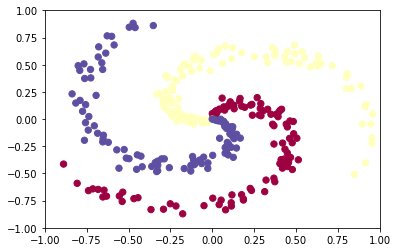

In [2]:
#generate random data -- not linearly separable 
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
num_train_examples = X.shape[0]
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

The sigmoid function "squashes" inputs to lie between 0 and 1. Unfortunately, this means that for inputs with sigmoid output close to 0 or 1, the gradient with respect to those inputs are close to zero. This leads to the phenomenon of vanishing gradients, where gradients drop close to zero, and the net does not learn well.

On the other hand, the relu function (max(0, x)) does not saturate with input size. Plot these functions to gain intution.

In [3]:
def sigmoid(x):
    x = 1/(1+np.exp(-x))
    return x

def sigmoid_grad(x):
    return (x)*(1-x)

def relu(x):
    return np.maximum(0,x)

def tanh(x):
    return (2*sigmoid(2*x) - 1)

def tanh_grad(x):
    return (1 - (tanh(x))**2)

In [4]:
#function to train a three layer neural net with either RELU or sigmoid nonlinearity via vanilla grad descent

def three_layer_net(NONLINEARITY,X,y, model, step_size, reg):
    #parameter initialization
    
    h= model['h']
    h2= model['h2']
    W1= model['W1']
    W2= model['W2']
    W3= model['W3']
    b1= model['b1']
    b2= model['b2']
    b3= model['b3']
    
    
    # some hyperparameters


    # gradient descent loop
    num_examples = X.shape[0]
    plot_array_1=[]
    plot_array_2=[]
    for i in range(50000):

        #FOWARD PROP

        if NONLINEARITY== 'RELU':
            hidden_layer = relu(np.dot(X, W1) + b1)
            hidden_layer2 = relu(np.dot(hidden_layer, W2) + b2)
            scores = np.dot(hidden_layer2, W3) + b3

        elif NONLINEARITY == 'SIGM':
            hidden_layer = sigmoid(np.dot(X, W1) + b1)
            hidden_layer2 = sigmoid(np.dot(hidden_layer, W2) + b2)
            scores = np.dot(hidden_layer2, W3) + b3
        
        elif NONLINEARITY == 'TANH':
            hidden_layer = tanh(np.dot(X, W1) + b1)
            hidden_layer2 = tanh(np.dot(hidden_layer, W2) + b2)
            scores = np.dot(hidden_layer2, W3) + b3

        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)+ 0.5*reg*np.sum(W3*W3)
        loss = data_loss + reg_loss
        if i % 1000 == 0:
            print("iteration : "+ str(i) + " loss : " + str(loss)  )


        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y] -= 1
        dscores /= num_examples

 
        # BACKPROP HERE
        dW3 = (hidden_layer2.T).dot(dscores)
        db3 = np.sum(dscores, axis=0, keepdims=True)


        if NONLINEARITY == 'RELU':

            #backprop ReLU nonlinearity here
            dhidden2 = np.dot(dscores, W3.T)
            dhidden2[hidden_layer2 <= 0] = 0
            dW2 =  np.dot( hidden_layer.T, dhidden2)
            plot_array_2.append(np.sum(np.abs(dW2))/np.sum(np.abs(dW2.shape)))
            db2 = np.sum(dhidden2, axis=0)
            dhidden = np.dot(dhidden2, W2.T)
            dhidden[hidden_layer <= 0] = 0
            
        elif NONLINEARITY == 'SIGM':

            #backprop sigmoid nonlinearity here
            dhidden2 = dscores.dot(W3.T)*sigmoid_grad(hidden_layer2)
            dW2 = (hidden_layer.T).dot(dhidden2)
            plot_array_2.append(np.sum(np.abs(dW2))/np.sum(np.abs(dW2.shape)))
            db2 = np.sum(dhidden2, axis=0)
            dhidden = dhidden2.dot(W2.T)*sigmoid_grad(hidden_layer)
        
        elif NONLINEARITY == 'TANH':
            
            #backprop tanh nonlinearity here
            dhidden2 = dscores.dot(W3.T)*tanh_grad(hidden_layer2)
            dW2 = (hidden_layer.T).dot(dhidden2)
            plot_array_2.append(np.sum(np.abs(dW2))/np.sum(np.abs(dW2.shape)))
            db2 = np.sum(dhidden2, axis=0)
            dhidden = dhidden2.dot(W2.T)*tanh_grad(hidden_layer)
            

        
        dW1 =  np.dot(X.T, dhidden)
        plot_array_1.append(np.sum(np.abs(dW1))/np.sum(np.abs(dW1.shape)))
        db1 = np.sum(dhidden, axis=0)

        # add regularization
        dW3+= reg * W3
        dW2 += reg * W2
        dW1 += reg * W1
        
        #option to return loss, grads -- uncomment next comment
        grads={}
        grads['W1']=dW1
        grads['W2']=dW2
        grads['W3']=dW3
        grads['b1']=db1
        grads['b2']=db2
        grads['b3']=db3
        #return loss, grads
        
        
        # update
        W1 += -step_size * dW1
        b1 += -step_size * db1
        W2 += -step_size * dW2
        b2 += -step_size * db2
        W3 += -step_size * dW3
        b3 += -step_size * db3
    # evaluate training set accuracy
    if NONLINEARITY == 'RELU':
        hidden_layer = relu(np.dot(X, W1) + b1)
        hidden_layer2 = relu(np.dot(hidden_layer, W2) + b2)
    elif NONLINEARITY == 'SIGM':
        hidden_layer = sigmoid(np.dot(X, W1) + b1)
        hidden_layer2 = sigmoid(np.dot(hidden_layer, W2) + b2)
    scores = np.dot(hidden_layer2, W3) + b3
    predicted_class = np.argmax(scores, axis=1)
    print("training accuracy:" + str(np.mean(predicted_class == y)))  
    #return cost, grads
    return plot_array_1, plot_array_2, W1, W2, W3, b1, b2, b3


## Train net with sigmoid nonlinearity first

In [5]:
#Initialize toy model, train sigmoid net

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
h=50
h2=50
num_train_examples = X.shape[0]

model={}
model['h'] = h # size of hidden layer 1
model['h2']= h2# size of hidden layer 2
model['W1']= 0.1 * np.random.randn(D,h)
model['b1'] = np.zeros((1,h))
model['W2'] = 0.1 * np.random.randn(h,h2)
model['b2']= np.zeros((1,h2))
model['W3'] = 0.1 * np.random.randn(h2,K)
model['b3'] = np.zeros((1,K))

(sigm_array_1, sigm_array_2, s_W1, s_W2,s_W3, s_b1, s_b2,s_b3) = three_layer_net('SIGM', X,y,model, step_size=1e-1, reg=1e-3)


iteration : 0 loss : 1.1564048888640268
iteration : 1000 loss : 1.1007369422747169
iteration : 2000 loss : 0.9996976474584222
iteration : 3000 loss : 0.8554946768068612
iteration : 4000 loss : 0.8194272926985829
iteration : 5000 loss : 0.8148248201455692
iteration : 6000 loss : 0.8105259085596594
iteration : 7000 loss : 0.8059427888467368
iteration : 8000 loss : 0.8006883214893732
iteration : 9000 loss : 0.7939760223457257
iteration : 10000 loss : 0.7832005415212004
iteration : 11000 loss : 0.759908785971414
iteration : 12000 loss : 0.7197916117626575
iteration : 13000 loss : 0.6831938875797994
iteration : 14000 loss : 0.6558471217342812
iteration : 15000 loss : 0.6349964251436383
iteration : 16000 loss : 0.6185271218753057
iteration : 17000 loss : 0.6022458750439876
iteration : 18000 loss : 0.5797104701761298
iteration : 19000 loss : 0.5462637334154149
iteration : 20000 loss : 0.5128309779987612
iteration : 21000 loss : 0.4924029190124008
iteration : 22000 loss : 0.481853679426717
ite

In [6]:
#Re-initialize model, train relu net

model={}
model['h'] = h # size of hidden layer 1
model['h2']= h2# size of hidden layer 2
model['W1']= 0.1 * np.random.randn(D,h)
model['b1'] = np.zeros((1,h))
model['W2'] = 0.1 * np.random.randn(h,h2)
model['b2']= np.zeros((1,h2))
model['W3'] = 0.1 * np.random.randn(h2,K)
model['b3'] = np.zeros((1,K))

(relu_array_1, relu_array_2, r_W1, r_W2,r_W3, r_b1, r_b2,r_b3) = three_layer_net('RELU', X,y,model, step_size=1e-1, reg=1e-3)

iteration : 0 loss : 1.1161878505332794
iteration : 1000 loss : 0.2750473719183876
iteration : 2000 loss : 0.15229739108568793
iteration : 3000 loss : 0.1363700498508273
iteration : 4000 loss : 0.13085339604761723
iteration : 5000 loss : 0.1278783087185082
iteration : 6000 loss : 0.12595052350220223
iteration : 7000 loss : 0.12459912899799815
iteration : 8000 loss : 0.12350220538037718
iteration : 9000 loss : 0.12259421916677461
iteration : 10000 loss : 0.12183316159784804
iteration : 11000 loss : 0.12120238213822207
iteration : 12000 loss : 0.12064999237838808
iteration : 13000 loss : 0.1201646007717303
iteration : 14000 loss : 0.11973390288156793
iteration : 15000 loss : 0.11934477378825434
iteration : 16000 loss : 0.11900040882732316
iteration : 17000 loss : 0.11869574387761538
iteration : 18000 loss : 0.11842259785330742
iteration : 19000 loss : 0.11816648588754516
iteration : 20000 loss : 0.11793219180877035
iteration : 21000 loss : 0.11771802461981937
iteration : 22000 loss : 0.1

In [7]:
#Re-initialize model, train tanh net

model={}
model['h'] = h # size of hidden layer 1
model['h2']= h2# size of hidden layer 2
model['W1']= 0.1 * np.random.randn(D,h)
model['b1'] = np.zeros((1,h))
model['W2'] = 0.1 * np.random.randn(h,h2)
model['b2']= np.zeros((1,h2))
model['W3'] = 0.1 * np.random.randn(h2,K)
model['b3'] = np.zeros((1,K))

(tanh_array_1, tanh_array_2, t_W1, t_W2,t_W3, t_b1, t_b2,t_b3) = three_layer_net('TANH', X,y,model, step_size=1e-1, reg=1e-3)

iteration : 0 loss : 1.1068763405022943
iteration : 1000 loss : 0.765900305099139
iteration : 2000 loss : 0.43433340575057927
iteration : 3000 loss : 0.22102602425514709
iteration : 4000 loss : 0.17630149048886168
iteration : 5000 loss : 0.16120110789075087
iteration : 6000 loss : 0.15403330978940422
iteration : 7000 loss : 0.14995389923671038
iteration : 8000 loss : 0.14756987592868553
iteration : 9000 loss : 0.1460033554067789
iteration : 10000 loss : 0.14484074848949718
iteration : 11000 loss : 0.143917150556344
iteration : 12000 loss : 0.1431524860703442
iteration : 13000 loss : 0.1425024253504807
iteration : 14000 loss : 0.1419396983654305
iteration : 15000 loss : 0.14144531574346852
iteration : 16000 loss : 0.14100513992998642
iteration : 17000 loss : 0.1406086147052447
iteration : 18000 loss : 0.14024783674661548
iteration : 19000 loss : 0.1399167397799024
iteration : 20000 loss : 0.1396105838903235
iteration : 21000 loss : 0.13932578167142134
iteration : 22000 loss : 0.13905997

## The Vanishing Gradient Issue

We can use the sum of the magnitude of gradients for the weights between hidden layers as a cheap heuristic to measure speed of learning (you can also use the magnitude of gradients for each neuron in the hidden layer here). Intuitevely, when the magnitude of the gradients of the weight vectors or of each neuron are large, the net is learning faster. (NOTE: For our net, each hidden layer has the same number of neurons. If you want to play around with this, make sure to adjust the heuristic to account for the number of neurons in the layer).

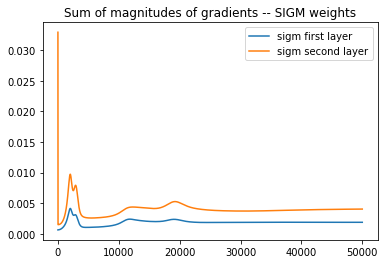

In [8]:
plt.plot(np.array(sigm_array_1))
plt.plot(np.array(sigm_array_2))
plt.title('Sum of magnitudes of gradients -- SIGM weights')
plt.legend(("sigm first layer", "sigm second layer"))


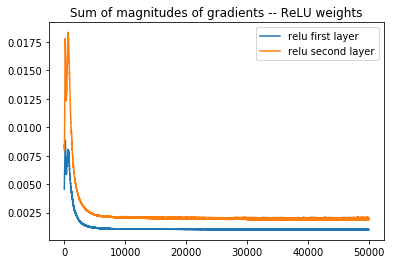

In [9]:
plt.plot(np.array(relu_array_1))
plt.plot(np.array(relu_array_2))
plt.title('Sum of magnitudes of gradients -- ReLU weights')
plt.legend(("relu first layer", "relu second layer"))

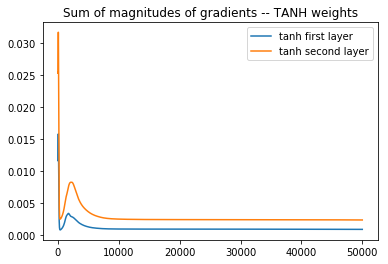

In [10]:
plt.plot(np.array(tanh_array_1))
plt.plot(np.array(tanh_array_2))
plt.title('Sum of magnitudes of gradients -- TANH weights')
plt.legend(("tanh first layer", "tanh second layer"))

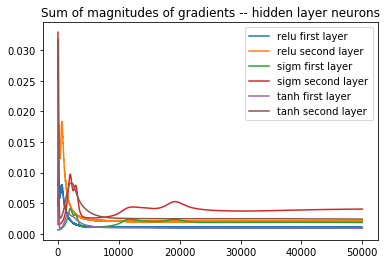

In [11]:
# Overlaying the two plots to compare
plt.plot(np.array(relu_array_1))
plt.plot(np.array(relu_array_2))
plt.plot(np.array(sigm_array_1))
plt.plot(np.array(sigm_array_2))
plt.plot(np.array(tanh_array_1))
plt.plot(np.array(tanh_array_2))
plt.title('Sum of magnitudes of gradients -- hidden layer neurons')
plt.legend(("relu first layer", "relu second layer","sigm first layer", "sigm second layer","tanh first layer","tanh second layer"))

We can see how well each classifier does in terms of distinguishing the toy data classes. As expected, since the ReLU net trains faster, for a set number of epochs it performs better compared to the sigmoid net

(-1.8712034092398278, 1.8687965907601756)

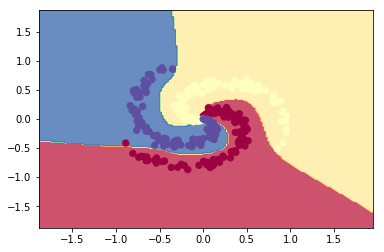

In [12]:


# plot the classifiers- SIGMOID
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(sigmoid(np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], s_W1) + s_b1), s_W2) + s_b2), s_W3) + s_b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())



(-1.8712034092398278, 1.8687965907601756)

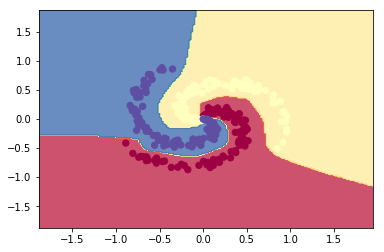

In [13]:
# plot the classifiers-- RELU
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(relu(np.dot(relu(np.dot(np.c_[xx.ravel(), yy.ravel()], r_W1) + r_b1), r_W2) + r_b2), r_W3) + r_b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


(-1.8712034092398278, 1.8687965907601756)

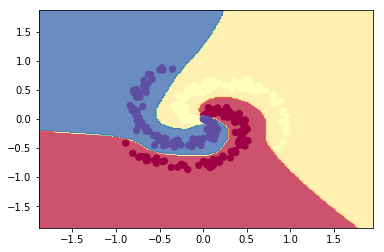

In [14]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(tanh(np.dot(tanh(np.dot(np.c_[xx.ravel(), yy.ravel()], t_W1) + t_b1), t_W2) + t_b2), t_W3) + t_b3
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Overfitting and Underfitting

![overfitting](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

![overfittign](https://www.apixio.com/wp-content/uploads/2017/10/classification-with-overfitting-2.png)

![over](https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/overfitting-logreg-ex.png)

![fitting_curves](http://bioinfo.iric.ca/wpbioinfo/wp-content/uploads/2017/10/error_curves.png)

![overfitting](http://srdas.github.io/DLBook/DL_images/UnderfittingOverfitting.png)

# Overfitting

Overfitting refers to a model that models the training data too well.

- Overfitting happens when a model learns the **detail and noise** in the training data to the extent that it **negatively** impacts the performance of the model on new data.
- **Noise or random fluctuations** in the training data is picked up and **learned** as concepts by the model

- Occurs when the **Representation Power** of the model is way too much when compared to the **actual complexity** needed to solve the problem.

# Underfitting

Underfitting refers to a model that can neither model the training data nor generalize to new data.

- An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

- Underfitting can easily be detected as the training performance will be low given a proper metric. So its obviously not suitable for deployment.

- Increase the model's representation power by increasing the number of parameters to optimize incase of parametric models
  - In neural Nets, increase the number of hidden layers and no of neurons per hidden layer. This increases the models representation capability.
  

# How to avoid overfitting? 

> Regularization

## Parameter Penalties

- Adding Parameter norm penalty $\Omega(\theta)$ to the loss function
- $\Omega(\theta)$ can be any function of $\theta$, we will see about it in detail.

\begin{equation}
\vec J(\theta: X,y) = J(\theta : X, y) + \alpha\ \Omega(\theta) \\
\alpha\ \epsilon\ [0, \infty]
\end{equation}

The term $\alpha$ decides the amount of regularization term to add.

| $\alpha$ | Regularization |
|---|---|
|0| No Regularization whatsoever| 
| $\downarrow$ | $\downarrow$ |
| $\uparrow$ | $\uparrow$ |
| $\infty$ | Infinite Penalty, $\theta$ collapses to 0

- In Neural nets, only $W$ parameters are subject to regularization, bias vectors ($b$) are not. This is because, 
  - Each weight $W_{ij}$ specifies how 2 variables interact. Fitting / finding the correct Weight value requires observing different values of the 2 variables at different conditions.
  - Bias Vectors control only single variable.
  - We might induce underfitting by including redularization in bias values.

### $L^2$ Parameter Regularization

> Commonly known as **weight decay**.

- This regularization strategy drives weights close to **origin**.

- $\Omega(\theta) = \frac{1}{2}||w||_2^2$

- Also known as **ridge regression** or **Tikhonov Regression**

Lets assume A, B are highly correlated features.

> Corellation means A and B are couppled in a sense. +ve correlation and -ve correlation.

They are so correlated so that we can assume A $\approx$ B. 

These 2 being the features of the model, the weights will multiply them and we get

$
 Y = W_aA + W_bB
$

Lets assume $W_a = 4, W_b = -2$, but since A and B are almost equal so

\begin{equation}
Y = 4A - 2B \approx 2A
\end{equation}

But,

\begin{equation}
Y = 10A - 8B \approx 2A
\end{equation}

and again,

\begin{equation}
Y = 1000002A - 1000000B \approx 2A
\end{equation}

So you can see the difficulty in $optimization$. So this regularization basically says, if such a condition arises, choose the smallest (closest to origin) $W_a, W_b$ which satisfies the condition.


### $L^1$ Regularization

Here similar to $L^2$ Regularization, but the regularization function is different.

\begin{equation}
\Omega(\theta) = ||w||_1 = \sum_i|w_i|
\end{equation}

Here the optimal solution for some paramters will be 0. This means, $L^1$ regularization will favour **sparse** solutions. 

Can be used in **feature selection** mechanism. If weights of some features reduces to 0, this means we can safely disregard those features from our model.
  - Remember $W$ values for features implies the importance of the features in the prediction output. If the weight for a particular feature is 0, this means its nor important.


### Norm Regularizations as Constraint Optimizations

Recall,

\begin{equation}
\vec J(\theta; X, y) = J(\theta; X, y) + \alpha\ \Omega(\theta)
\end{equation}

Also recalling Lagrange Multipliers, 

![lagrange_multipliers](https://i.stack.imgur.com/9NIoJ.png)

![lagrange_multipliers](http://math.etsu.edu/multicalc/prealpha/chap2/chap2-9/10-8-20.gif)




# We'll now see an example of overfitting and another where we try to combat that using regularization

In [15]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

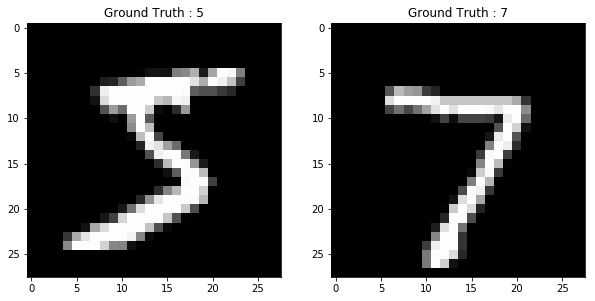

In [16]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [23]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [24]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [25]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [26]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [28]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 1.0841 - acc: 0.6743 - val_loss: 0.5491 - val_acc: 0.8353
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.4411 - acc: 0.8705 - val_loss: 0.3729 - val_acc: 0.8888
Epoch 3/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.3483 - acc: 0.8982 - val_loss: 0.3074 - val_acc: 0.9093
Epoch 4/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.3021 - acc: 0.9117 - val_loss: 0.3059 - val_acc: 0.9067
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.2653 - acc: 0.9222 - val_loss: 0.2584 - val_acc: 0.9240
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.2335 - acc: 0.9309 - val_loss: 0.2581 - val_acc: 0.9220
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.2056 - acc: 0.9389 - val_loss: 0.2149 - val_a

In [30]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 20us/step
Evaluation result on Test Data : Loss = 0.07914772396665067, accuracy = 0.9747


Text(0.5,1,'Accuracy Curves')

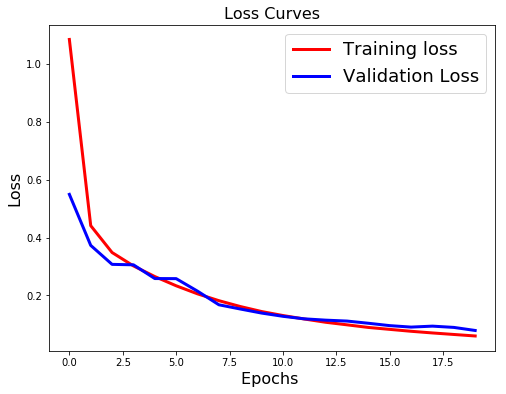

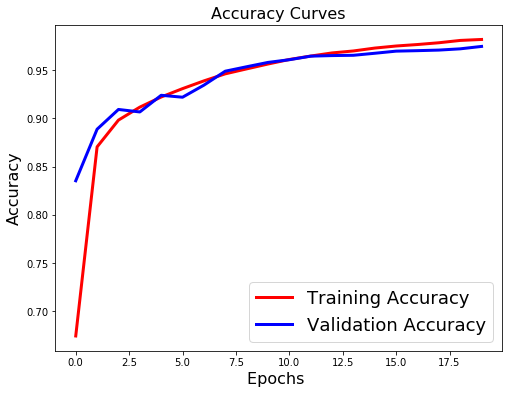

In [31]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## There is a clear sign of OverFitting. Why do you think so?

Carefully see the Validation loss and Training loss curve. Validation loss decreases and then it gradually increases. This means that model is memorising the dataset, though in this case accuracy is much higher. 

** How to combat that?? **
# Use Regularization !

In [32]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1050 - acc: 0.9688 - val_loss: 0.0919 - val_acc: 0.9736
Epoch 2/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0999 - acc: 0.9699 - val_loss: 0.0972 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.1003 - acc: 0.9706 - val_loss: 0.0906 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0946 - acc: 0.9721 - val_loss: 0.0884 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0933 - acc: 0.9727 - val_loss: 0.0869 - val_acc: 0.9754
Epoch 6/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.0895 - acc: 0.9729 - val_loss: 0.0877 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0883 - acc: 0.9739 - val_loss: 0.0887 - val_acc

Text(0.5,1,'Accuracy Curves')

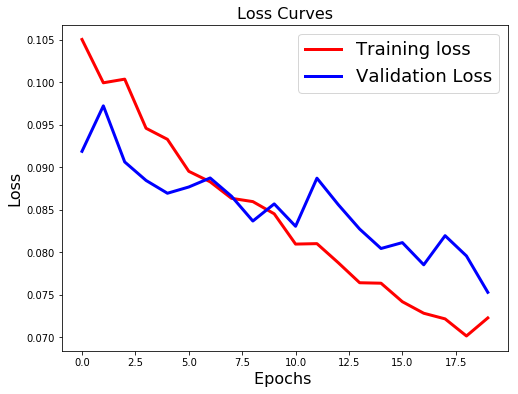

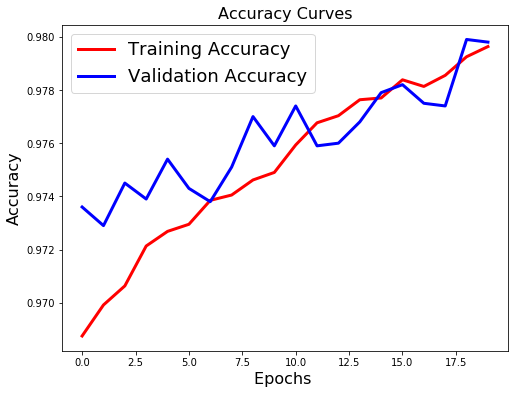

In [34]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## What we note??

* Validation loss is not increasing as it did before.
* Difference between the validation and training accuracy is not that much

This implies better generalisation and can work will on unseen data samples.


# Comparision of Various Optimizers: Stochastic Gradient Descent, RMSprop, Adam, Adagrad

In [35]:
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import *
from keras.datasets import mnist

In [36]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [37]:
def load_data():
    print ('Loading data...')
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    print ('Data loaded.')
    return [X_train, X_test, y_train, y_test]


In [38]:
def init_model(Optimizer,lrnr):
    start_time = time.time()
    print ('Compiling Model ... ')
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(300))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    optim_dict = {}
    optim_dict['RMSprop'] = RMSprop(lr = lrnr)
    optim_dict['SGD'] = SGD(lr = lrnr)
    optim_dict['Adam'] = Adam(lr = lrnr)
    optim_dict['Adagrad'] = Adagrad(lr = lrnr)
    optim = optim_dict[Optimizer]
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print ('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

In [39]:
def run_network(data=None, model=None, epochs=20, batch=256, Optimizer = 'RMSprop',lrnr = 1e-2):
    try:
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model(Optimizer,lrnr)

        history = LossHistory()
        print("####### Optimizer being Used: " + Optimizer)
        print ('Training model...')
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
                  callbacks=[history],
                  validation_data=(X_test, y_test), verbose=2)

        print ("Training duration : {0}".format(time.time() - start_time))
        score = model.evaluate(X_test, y_test, batch_size=16)

        print ("Network's test score [loss, accuracy]: {0}".format(score))
        return model, history.losses
    except KeyboardInterrupt:
        print (' KeyboardInterrupt')
        return model, history.losses

In [40]:
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')
    fig.show()

In [41]:
model1,losses1 = run_network(Optimizer='SGD')
model2,losses2 = run_network(Optimizer='RMSprop')
model3,losses3 = run_network(Optimizer='Adam')
model4,losses4 = run_network(Optimizer='Adagrad')

Loading data...
Data loaded.
Compiling Model ... 
Model compield in 0.08845806121826172 seconds
####### Optimizer being Used: SGD
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 1.7773 - acc: 0.4428 - val_loss: 1.0247 - val_acc: 0.8108
Epoch 2/20
 - 1s - loss: 0.9804 - acc: 0.7167 - val_loss: 0.5855 - val_acc: 0.8594
Epoch 3/20
 - 1s - loss: 0.7236 - acc: 0.7817 - val_loss: 0.4597 - val_acc: 0.8796
Epoch 4/20
 - 1s - loss: 0.6116 - acc: 0.8163 - val_loss: 0.4007 - val_acc: 0.8935
Epoch 5/20
 - 1s - loss: 0.5440 - acc: 0.8373 - val_loss: 0.3659 - val_acc: 0.9000
Epoch 6/20
 - 1s - loss: 0.4992 - acc: 0.8503 - val_loss: 0.3403 - val_acc: 0.9060
Epoch 7/20
 - 1s - loss: 0.4716 - acc: 0.8589 - val_loss: 0.3216 - val_acc: 0.9113
Epoch 8/20
 - 1s - loss: 0.4442 - acc: 0.8681 - val_loss: 0.3063 - val_acc: 0.9146
Epoch 9/20
 - 1s - loss: 0.4234 - acc: 0.8746 - val_loss: 0.2935 - val_acc: 0.9179
Epoch 10/20
 - 1s - loss: 0.4053 - acc: 0.8797 - val_lo

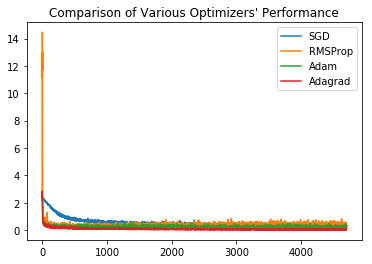

In [42]:
plt.title("Comparison of Various Optimizers' Performance")
plt.plot(losses1)
plt.plot(losses2)
plt.plot(losses3)
plt.plot(losses4)
plt.legend(['SGD','RMSProp','Adam','Adagrad'])
plt.show()

# Time to train your own neural network !!!

In [43]:
!pip install matplotlib

from keras.datasets import cifar10
import numpy as np
(train_images, train_labels), (test_images, test_labels)  = cifar10.load_data()

170500096/170498071 [==============================] - 174s 1us/step


In [0]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[5,2])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


In [0]:

# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()

model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

In [0]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

## Try to maximize the test accuracy !!! Take it as a challenge. (Tuning the parameters is basically an ART :p)